In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data

In [2]:
train_data = pd.read_csv('../data/raw/train.csv')
test_data = pd.read_csv('../data/raw/test.csv')

C:\Users\harry\AppData\Local\Temp\ipykernel_17304\3234525173.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../data/raw/train.csv')


In [3]:
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46618 entries, 0 to 46617
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 46618 non-null  object 
 1   conf                 46618 non-null  object 
 2   GP                   46618 non-null  int64  
 3   Min_per              46618 non-null  float64
 4   Ortg                 46618 non-null  float64
 5   usg                  46618 non-null  float64
 6   eFG                  46618 non-null  float64
 7   TS_per               46618 non-null  float64
 8   ORB_per              46618 non-null  float64
 9   DRB_per              46618 non-null  float64
 10  AST_per              46618 non-null  float64
 11  TO_per               46618 non-null  float64
 12  FTM                  46618 non-null  int64  
 13  FTA                  46618 non-null  int64  
 14  FT_per               46618 non-null  float64
 15  twoPM                46618 non-null 

In [4]:
print(train_data.describe())

                 GP       Min_per          Ortg           usg           eFG  \
count  46618.000000  46618.000000  46618.000000  46618.000000  46618.000000   
mean      23.542988     37.339013     91.784360     18.164578     44.424392   
std       10.076829     28.019801     30.235568      6.181982     18.026404   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.000000      9.600000     83.900000     14.600000     40.000000   
50%       28.000000     35.900000     97.000000     18.100000     47.500000   
75%       31.000000     62.200000    106.800000     21.800000     53.000000   
max       41.000000     98.000000    834.000000     50.000000    150.000000   

             TS_per       ORB_per       DRB_per       AST_per        TO_per  \
count  46618.000000  46618.000000  46618.000000  46618.000000  46618.000000   
mean      47.571397      5.654071     12.575102     10.923008     20.535915   
std       17.217909      9.985025     11.041089    

In [9]:

missing_values = train_data.isnull().sum()




In [11]:
print(missing_values)

team          0
conf          0
GP            0
Min_per       0
Ortg          0
             ..
stl          36
blk          36
pts          36
player_id     0
drafted       0
Length: 64, dtype: int64


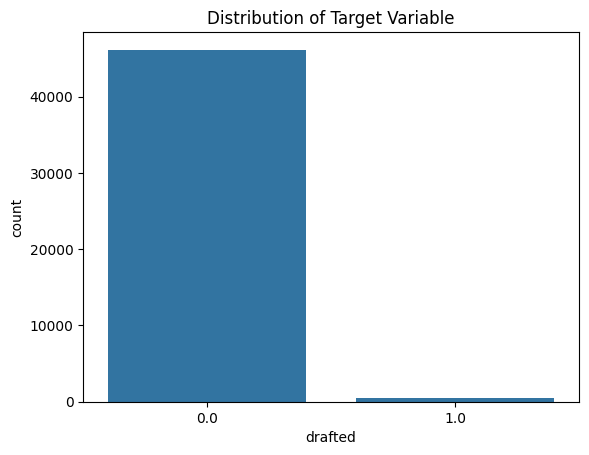

In [12]:
sns.countplot(x='drafted', data=train_data)
plt.title('Distribution of Target Variable')
plt.show()

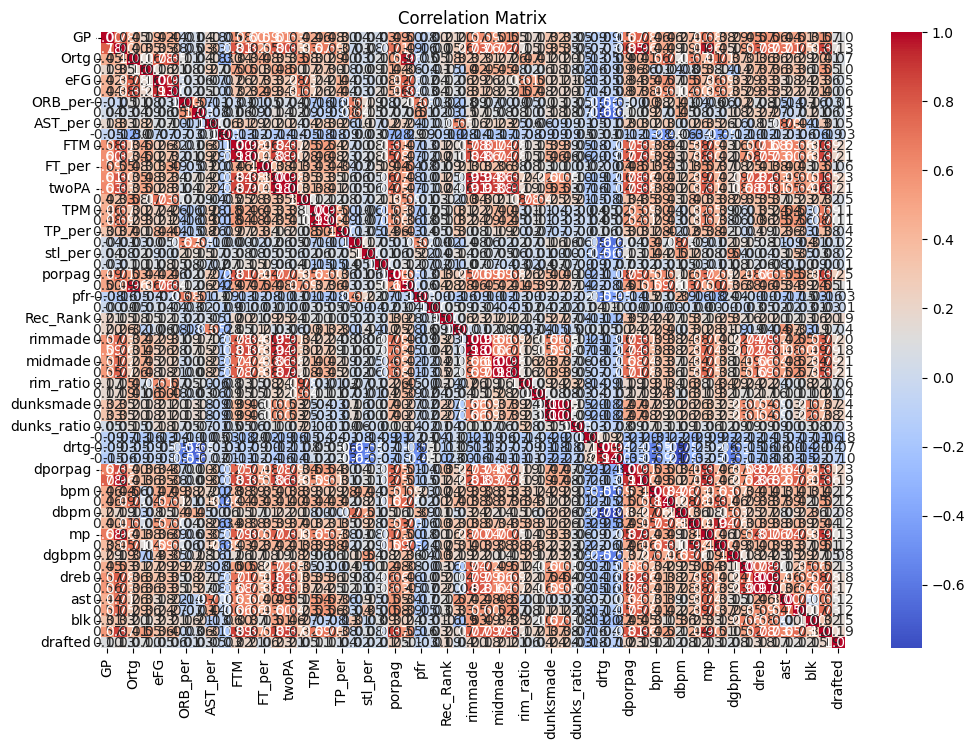

In [14]:
cols_num = train_data.select_dtypes(include=['float64', 'int64']).columns
corr_mat = train_data[cols_num].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
target_correlation = corr_mat['drafted'].sort_values(ascending=False)
print("Correlation with the target variable 'drafted':")
print(target_correlation)

Correlation with the target variable 'drafted':
drafted                1.000000
porpag                 0.254408
dunksmade              0.244103
dunksmiss_dunksmade    0.241155
twoPM                  0.226984
dporpag                0.225246
FTM                    0.215519
midmade                0.213052
FTA                    0.211458
twoPA                  0.211329
midmade_midmiss        0.208883
rimmade                0.199645
Rec_Rank               0.192941
pts                    0.192709
stops                  0.191534
dreb                   0.180355
rimmade_rimmiss        0.177341
treb                   0.172833
blk                    0.147695
oreb                   0.131687
mp                     0.131392
Min_per                0.130329
stl                    0.124399
bpm                    0.124047
ast                    0.121540
gbpm                   0.119523
obpm                   0.119450
ogbpm                  0.116436
TPM                    0.114003
adjoe                  0

In [29]:
relevant_features = target_correlation[abs(target_correlation) > 0.2].index
print("\nSelected relevant features based on correlation with target variable:")
print(relevant_features)


Selected relevant features based on correlation with target variable:
Index(['drafted', 'porpag', 'dunksmade', 'dunksmiss_dunksmade', 'twoPM',
       'dporpag', 'FTM', 'midmade', 'FTA', 'twoPA', 'midmade_midmiss'],
      dtype='object')


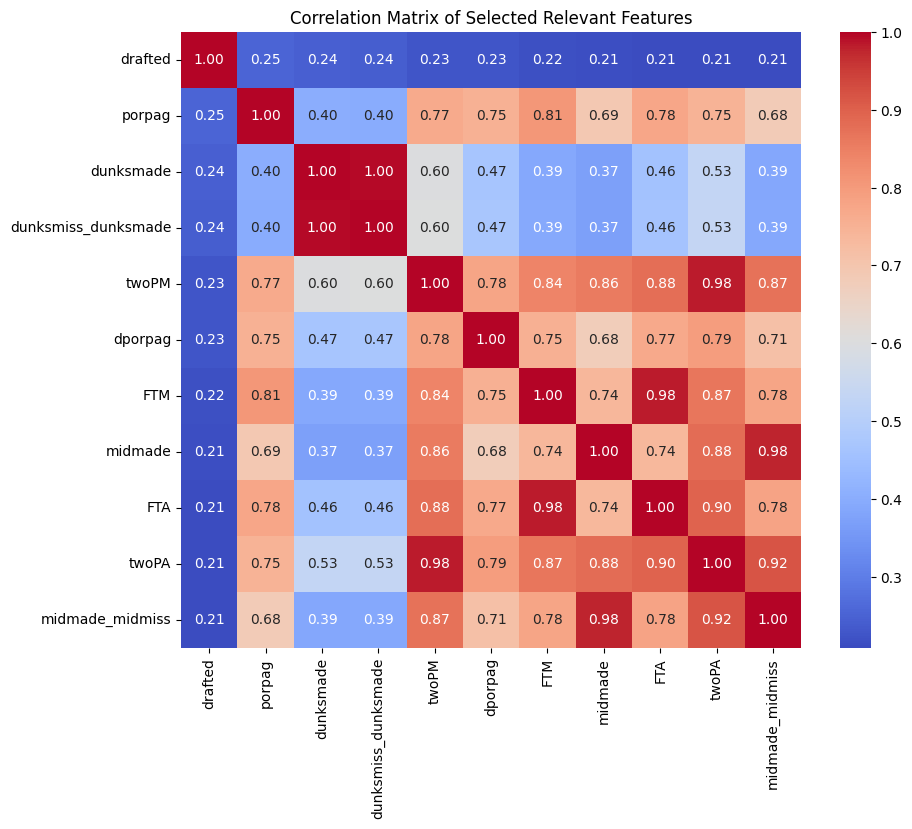

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[relevant_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Relevant Features')
plt.show()

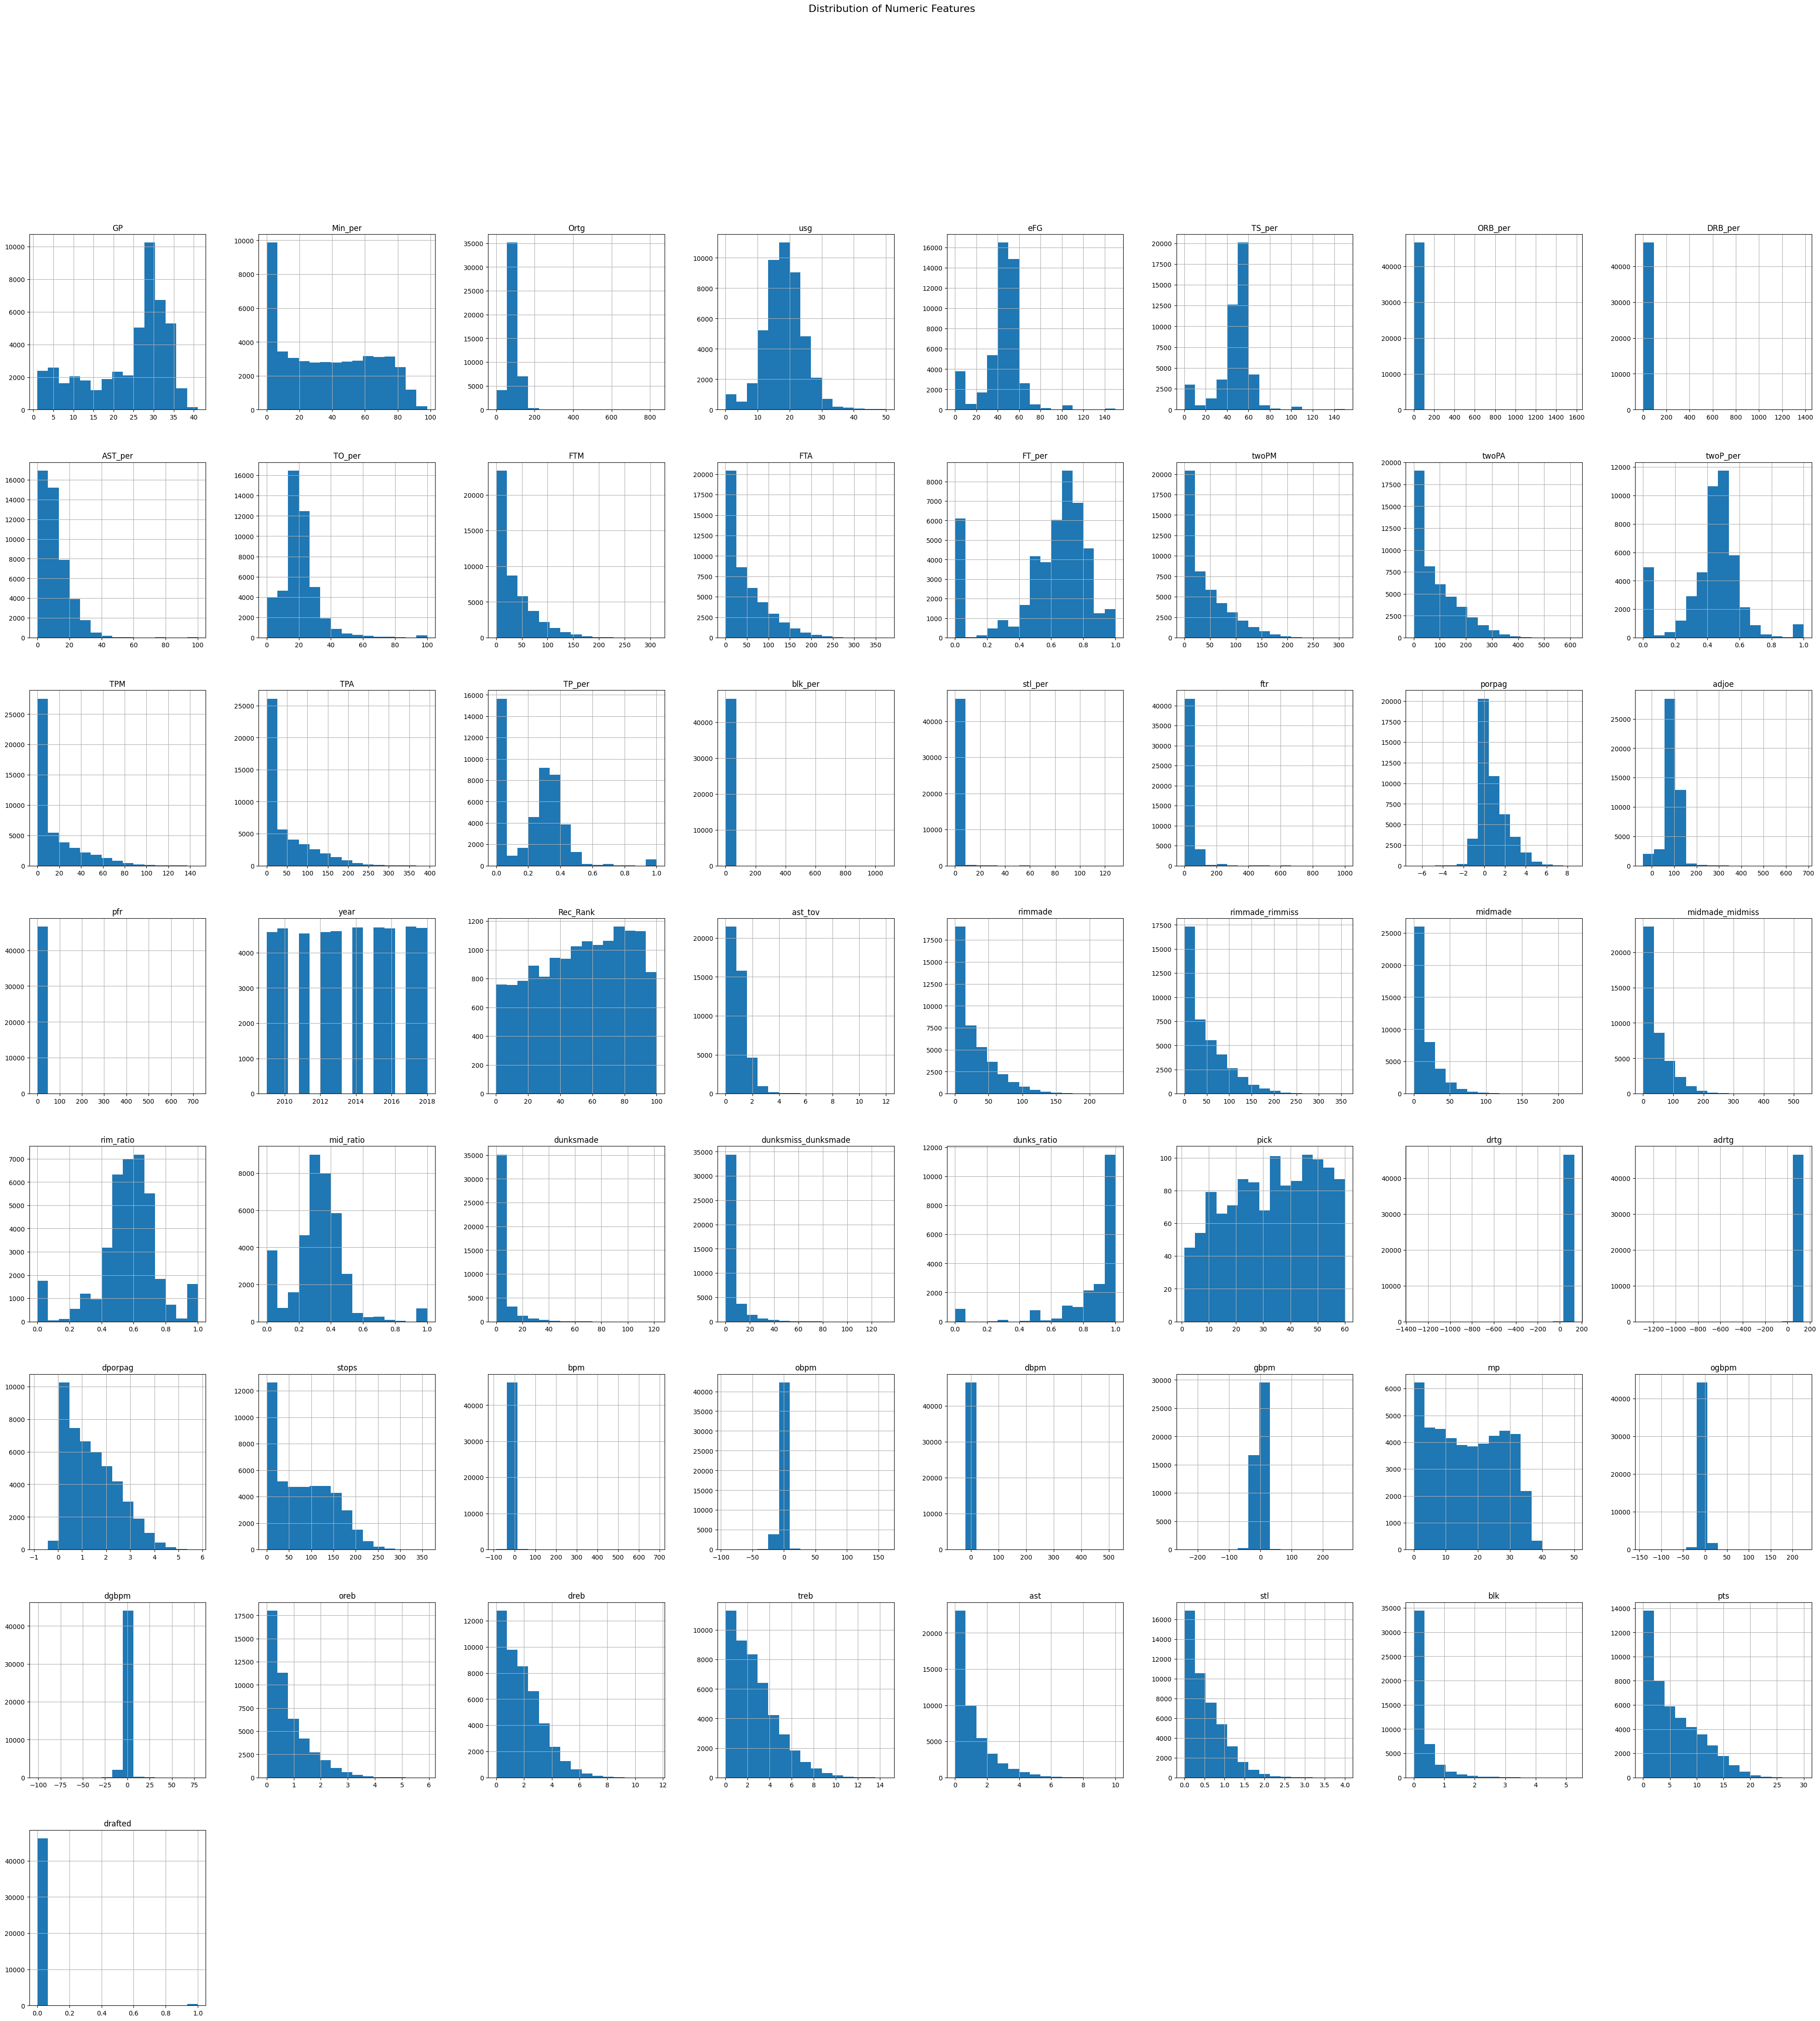

In [22]:
train_data[cols_num].hist(bins=15, figsize=(50, 50))
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

In [31]:
selected_features = ['porpag', 'dunksmade', 'dunksmiss_dunksmade', 'twoPM',
       'dporpag', 'FTM', 'midmade', 'FTA', 'twoPA', 'midmade_midmiss']
sns.pairplot(train_data[selected_features + ['drafted']], hue='drafted')
plt.suptitle('Pairplot of Selected Features', fontsize=16)
plt.show()

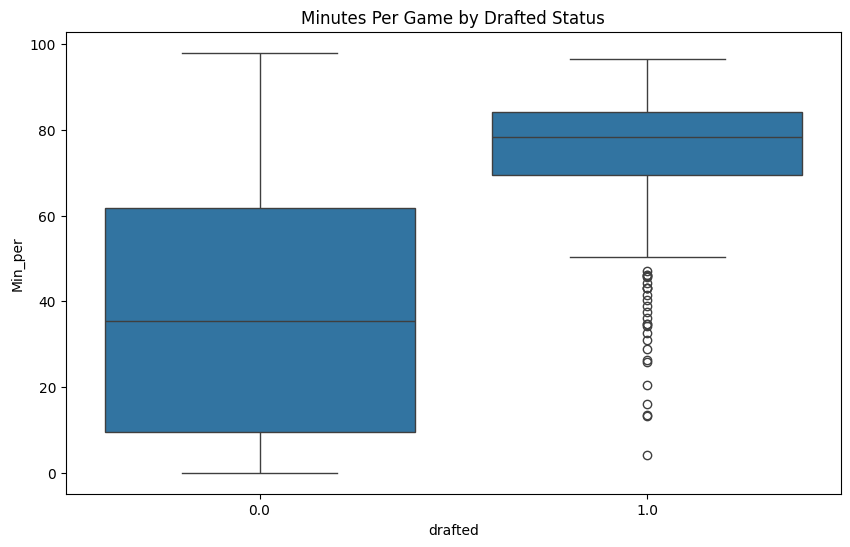

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='drafted', y='Min_per', data=train_data)
plt.title('Minutes Per Game by Drafted Status')
plt.show()

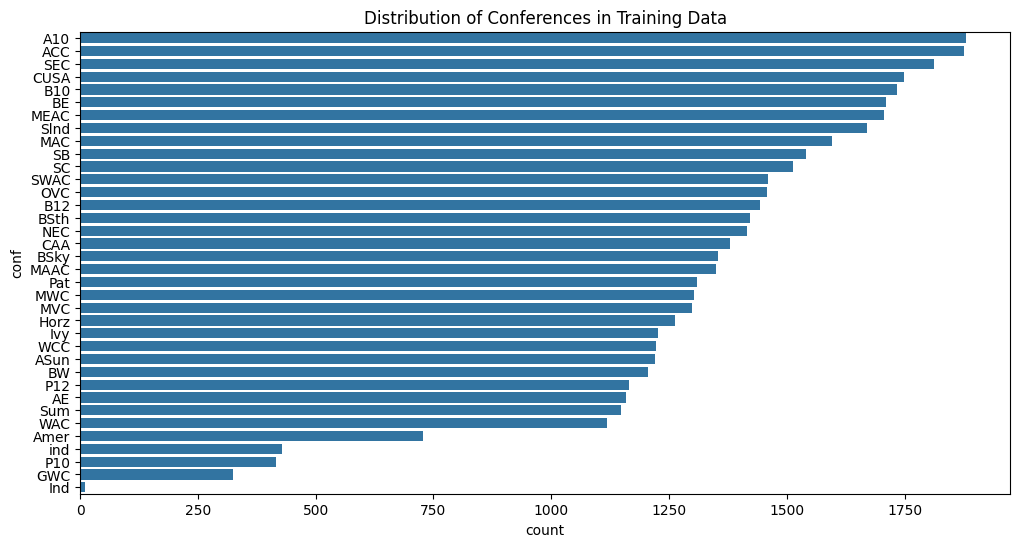

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(y='conf', data=train_data, order=train_data['conf'].value_counts().index)
plt.title('Distribution of Conferences in Training Data')
plt.show()

In [ ]:
train_data.to_csv('../data/interim/train_interim.csv', index=False)